In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [36]:
df=pd.read_csv("C:\\Users\\vinay\\Downloads\\ibm-hr-analytics-employee-attrition-performance\\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [ ]:
# for this model Attrition is label and we will try different model to find that 

In [37]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
# the data looks good as it does't have any null value

In [6]:
def un(df, a):
    unique_values = df[a].unique()
    return unique_values
coloumn=[]
coloumn=df.columns.tolist()
for i in coloumn:
    print(i)
    print(un(df,i))
    print("\n")
    

Age
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]


Attrition
['Yes' 'No']


BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


DailyRate
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  96

In [60]:
df=df.drop("EmployeeCount",axis=1)
df=df.drop("Over18",axis=1)
df=df.drop("StandardHours",axis=1)


In [ ]:
# i droped the above fildes because they have no value for the data as they are same for everyone

In [5]:
def un(df, a):
    unique_values = df[a].unique()
    return unique_values
coloumn=[]
coloumn=df.columns.tolist()
for i in coloumn:
    print(i)
    print(un(df,i))
    print("\n")
    

Age
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]


Attrition
['Yes' 'No']


BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


DailyRate
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  96

In [ ]:
# we have to encode many Fields so the model can read the data perfectly

In [38]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()

In [39]:
dfp=lab.fit_transform(df["Attrition"])
pd.Series(dfp)
df["Attrition"]=dfp

In [40]:
dfp=lab.fit_transform(df["BusinessTravel"])
pd.Series(dfp)
df["BusinessTravel"]=dfp

In [41]:
dfp=lab.fit_transform(df["Department"])
pd.Series(dfp)
df["Department"]=dfp

In [42]:
dfp=lab.fit_transform(df["EducationField"])
pd.Series(dfp)
df["EducationField"]=dfp

In [43]:
dfp=lab.fit_transform(df["Gender"])
pd.Series(dfp)
df["Gender"]=dfp

In [44]:
dfp=lab.fit_transform(df["JobRole"])
pd.Series(dfp)
df["JobRole"]=dfp

In [45]:
dfp=lab.fit_transform(df["MaritalStatus"])
pd.Series(dfp)
df["MaritalStatus"]=dfp

In [46]:
dfp=lab.fit_transform(df["OverTime"])
pd.Series(dfp)
df["OverTime"]=dfp

In [47]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [48]:
def un(df, a):
    unique_values = df[a].unique()
    return unique_values
coloumn=[]
coloumn=df.columns.tolist()
for i in coloumn:
    print(i)
    print(un(df,i))
    print("\n")
    

Age
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]


Attrition
[1 0]


BusinessTravel
[2 1 0]


DailyRate
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 1169 1145  630
  303 1256  440 1450 1452  4

In [49]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


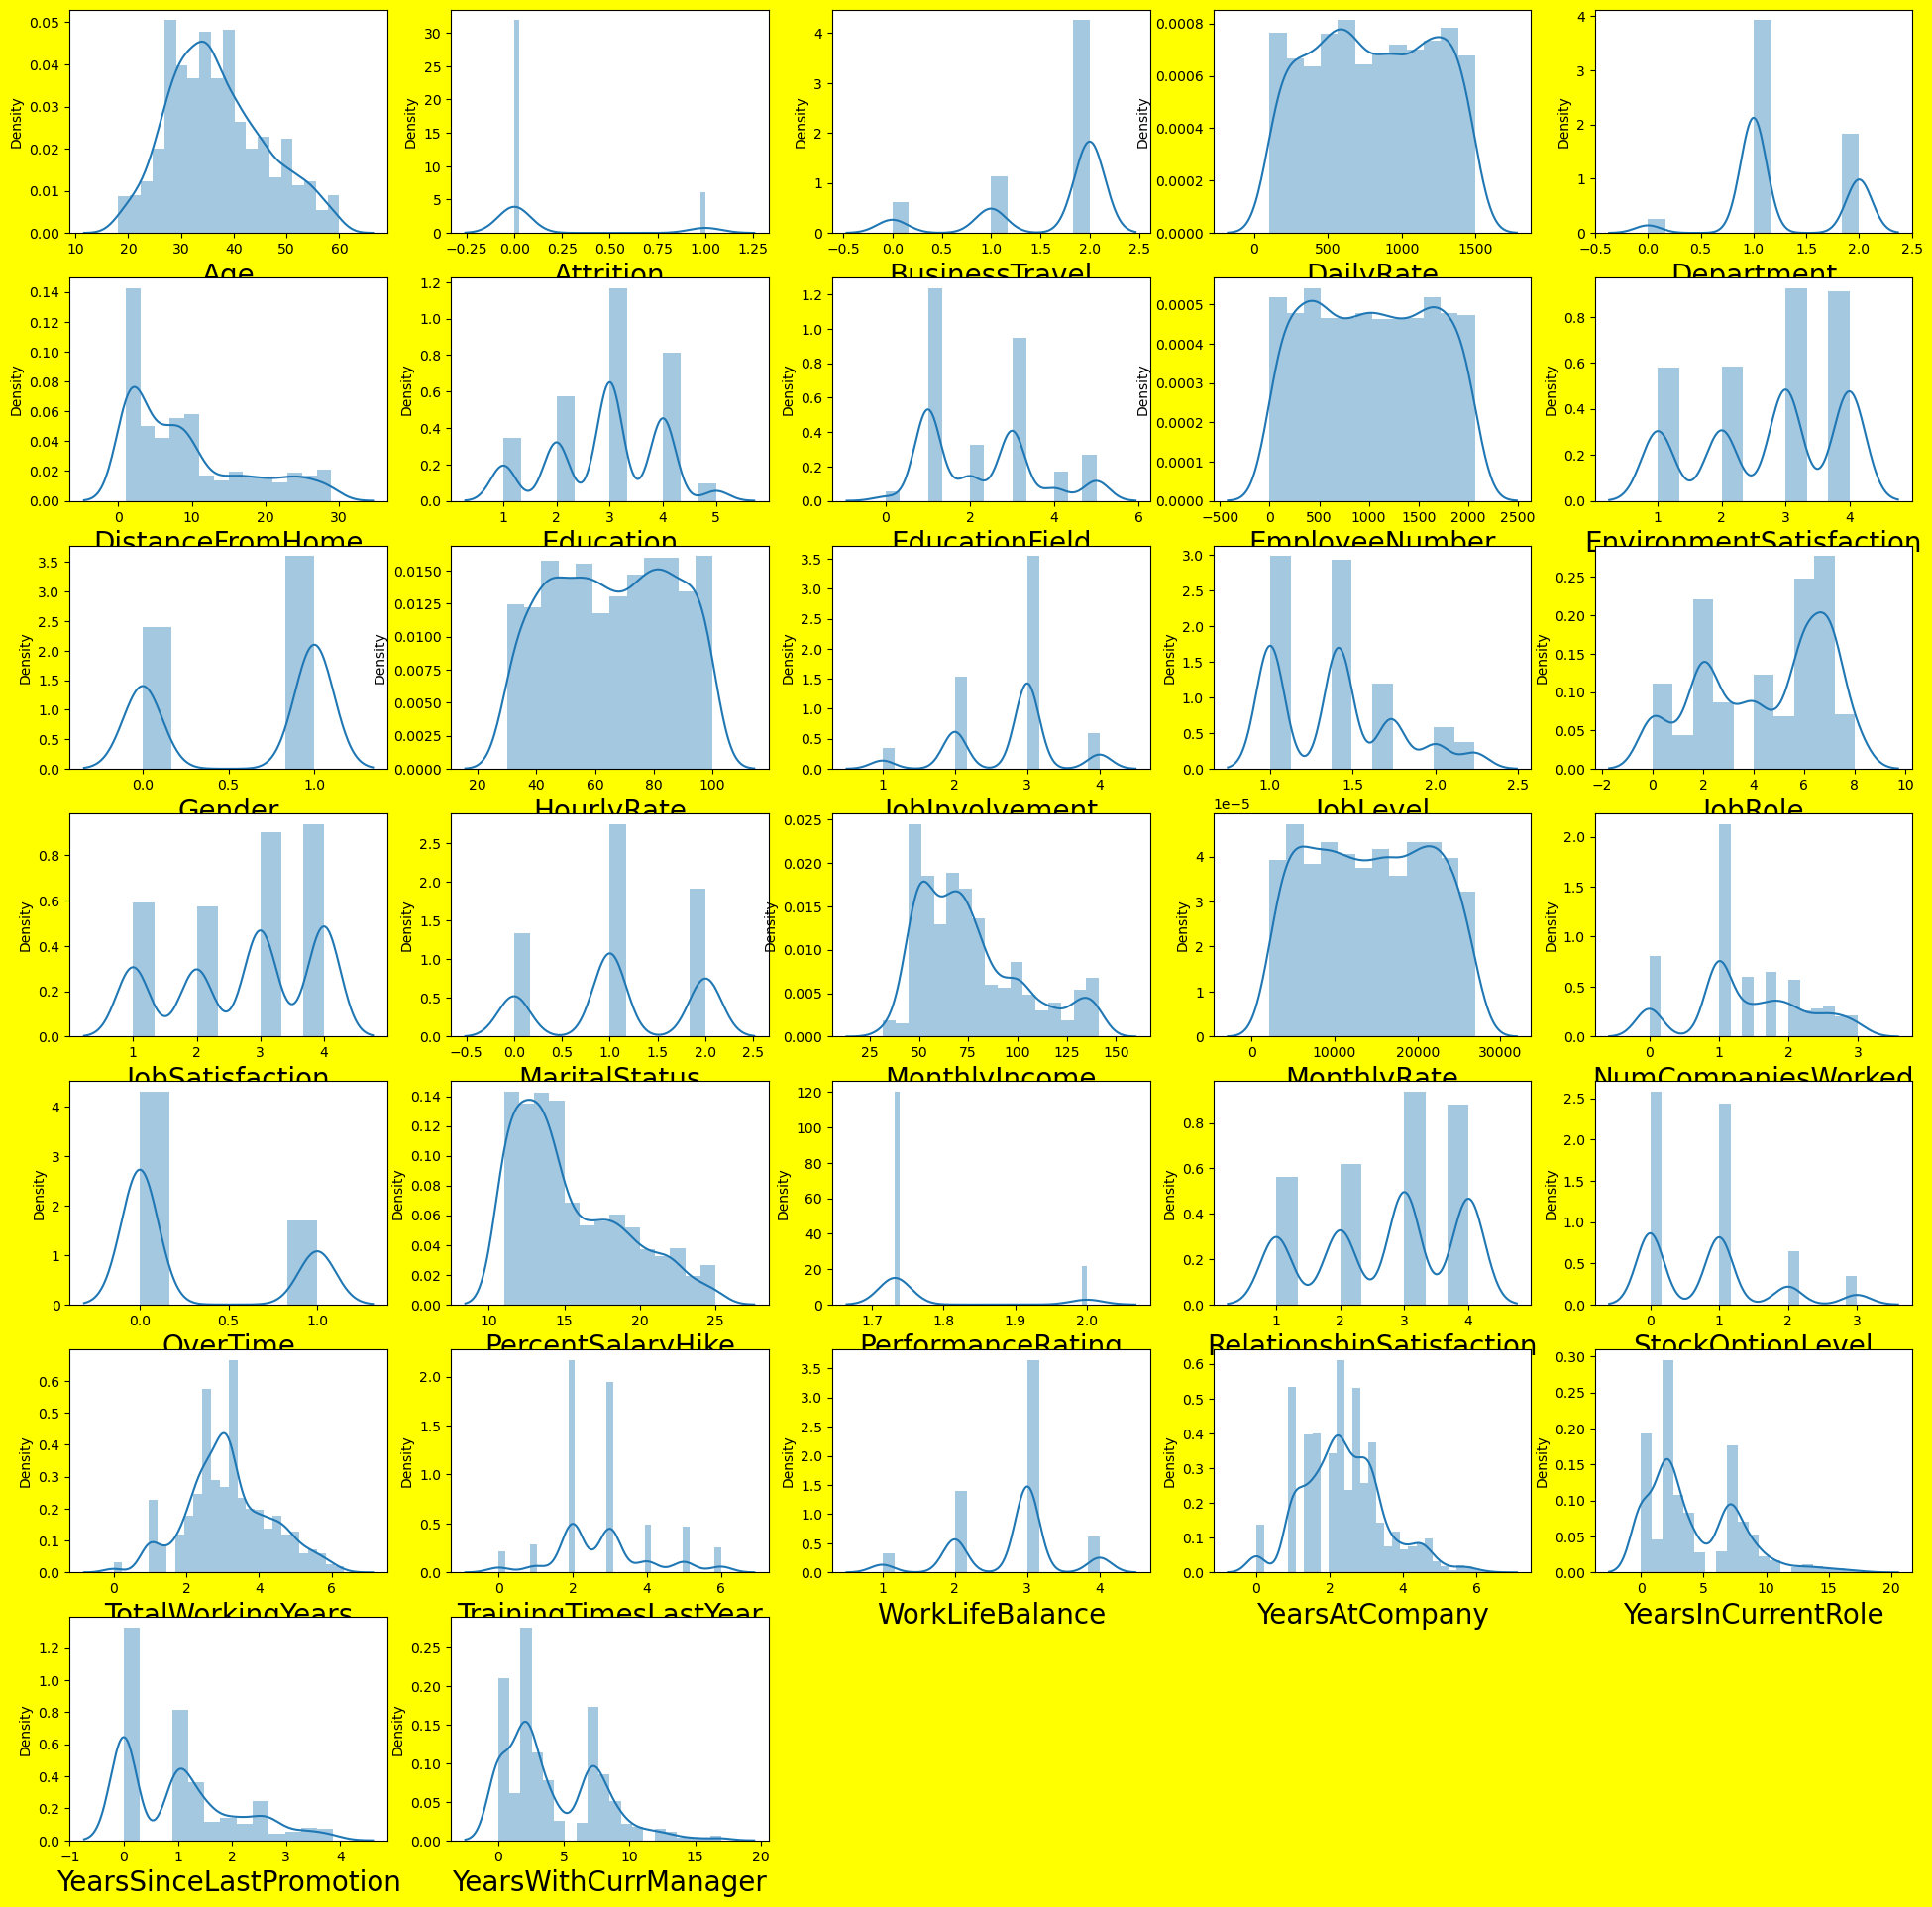

In [61]:
plt.figure(figsize=(24,24),facecolor="yellow")
plnum=1

for i in df.columns:
    if plnum<=32:
        ax=plt.subplot(7,5,plnum)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=20)
        
    plnum+=1
plt.show()
    

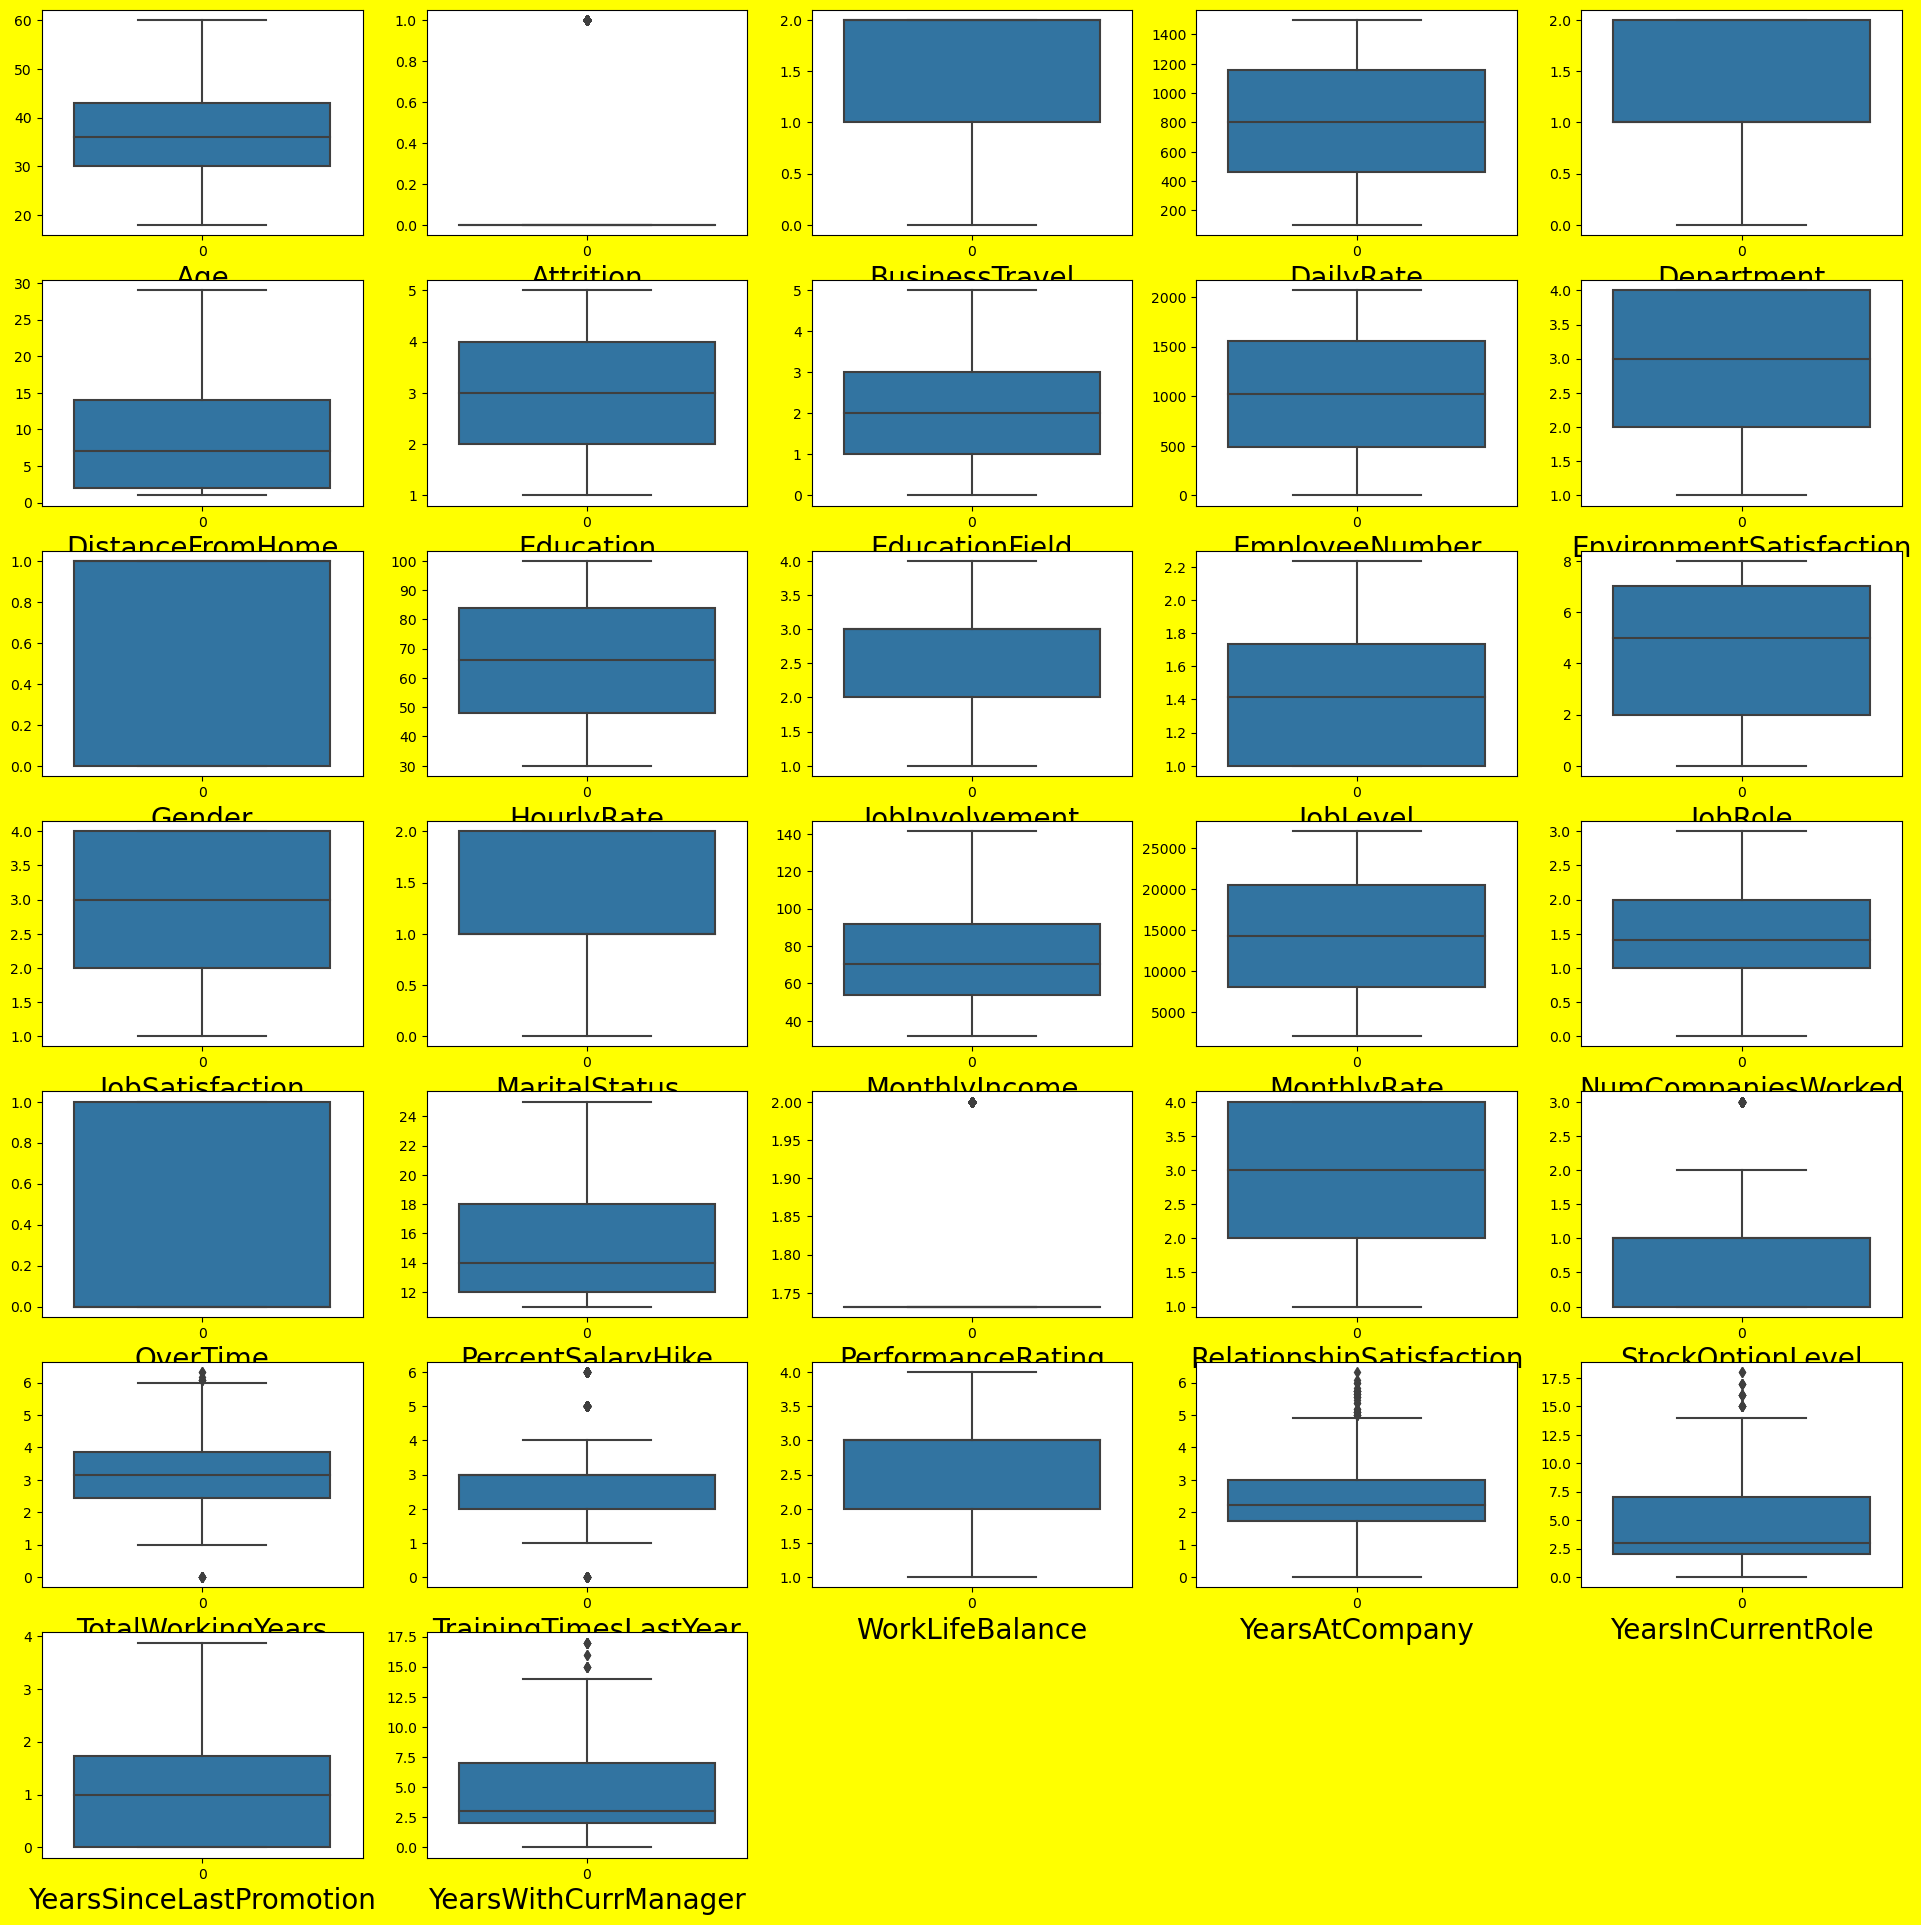

In [62]:
plt.figure(figsize=(24,24),facecolor="yellow")
plnum=1

for i in df:
    if plnum<=32:
        ax=plt.subplot(7,5,plnum)
        sns.boxplot(data=df[i])
        plt.xlabel(i,fontsize=20)
        
    plnum+=1
plt.show()
    

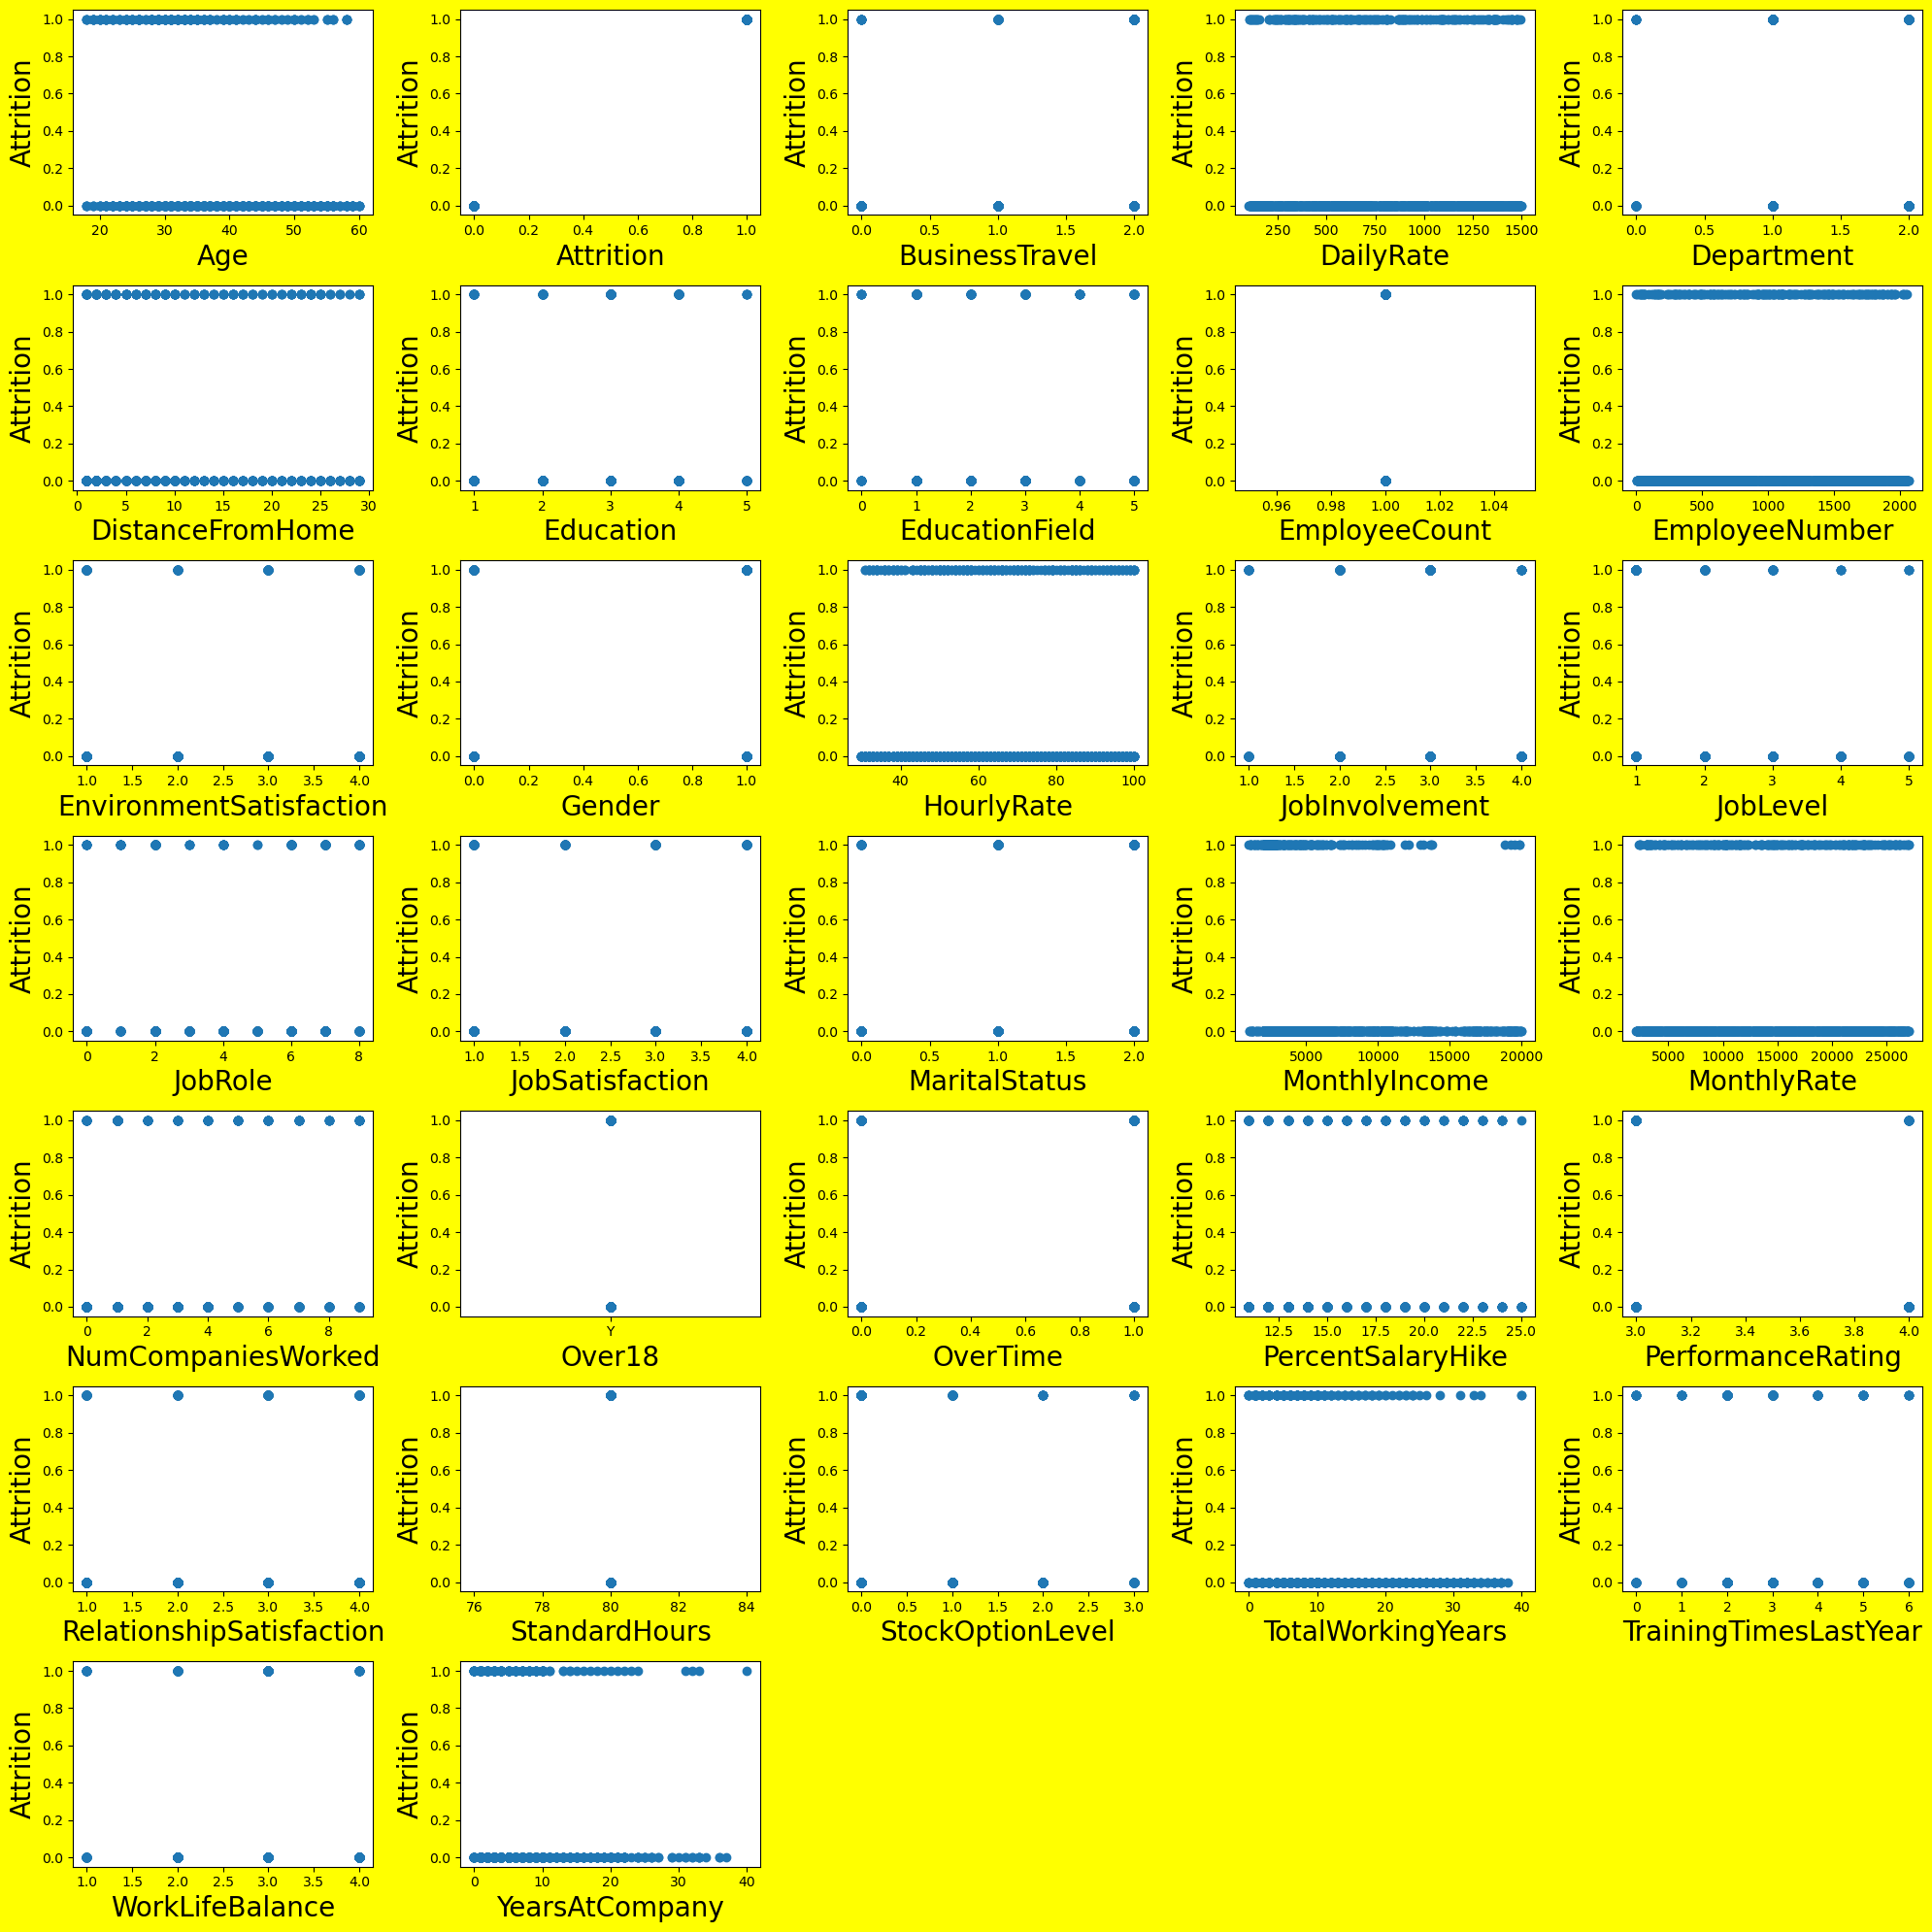

In [51]:
plt.figure(figsize=(20, 20), facecolor="yellow")
plnum = 1

for i in df:
    if plnum <= 32:
        ax = plt.subplot(7, 5, plnum)
        plt.scatter(df[i], df["Attrition"]) 
        plt.xlabel(i, fontsize=20)
        plt.ylabel("Attrition", fontsize=20)
    plnum += 1

plt.tight_layout()


In [63]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.593923
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.861960
MonthlyRate                 0.018578
NumCompaniesWorked          0.031303
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           0.176358
TrainingTimesLastYear       0.553124
W

In [ ]:
# as data have high skewness we have to reduce it

In [53]:
def skwe(a,df):
    df[a]=np.sqrt(df[a])
    

In [54]:
skwe("JobLevel",df)
skwe("MonthlyIncome",df)
skwe("NumCompaniesWorked",df)
skwe("TotalWorkingYears",df)
skwe("YearsAtCompany",df)
skwe("YearsSinceLastPromotion",df)


In [55]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.593923
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.861960
MonthlyRate                 0.018578
NumCompaniesWorked          0.031303
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
T

In [65]:
cor=df.corr()
cor

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,-0.010145,0.010146,...,0.001904,0.053535,0.037510,0.682115,-0.019621,-0.021490,0.291655,0.212901,0.196728,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.010577,-0.103369,...,0.002889,-0.045872,-0.137145,-0.208334,-0.059478,-0.063939,-0.178602,-0.160545,-0.049097,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,-0.015578,0.004174,...,-0.026341,-0.035986,-0.016727,0.038899,0.015240,-0.011256,-0.010077,-0.011497,-0.031610,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,-0.050990,0.018355,...,0.000473,0.007846,0.042143,0.020250,0.002453,-0.037848,-0.018989,0.009932,-0.038077,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.010895,-0.019395,...,-0.024604,-0.022414,-0.012193,-0.009965,0.036875,0.026383,0.019240,0.056315,0.027731,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,0.032916,-0.016075,...,0.027110,0.006557,0.044872,0.013280,-0.036942,-0.026556,0.015202,0.018845,0.011091,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,0.042070,-0.027128,...,-0.024539,-0.009118,0.018422,0.166427,-0.025100,0.009819,0.065393,0.060236,0.040684,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,-0.002516,0.043163,...,-0.005614,-0.004378,-0.016185,-0.021133,0.049195,0.041191,-0.009698,-0.010506,0.008178,-0.004130
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,1.000000,0.017621,...,-0.020359,-0.069861,0.062227,-0.007360,0.023603,0.010309,0.003559,-0.008416,0.002747,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,0.017621,1.000000,...,-0.029548,0.007665,0.003432,-0.014330,-0.019359,0.027627,0.005040,0.018007,0.026446,-0.004999


In [66]:
cor['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043236
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.049097
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
Y

In [67]:
x=df.drop('Attrition',axis=1)

In [68]:
y=df['Attrition']

In [69]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,-1.701283,-0.660531,-1.224745,...,-0.426230,-1.584178,-0.932014,-0.278944,-2.171982,-2.493820,0.040574,-0.063296,-0.989370,0.245834
1,1.322365,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,-1.699621,0.254625,0.816497,...,2.346151,1.191438,0.241988,0.008926,0.155707,0.338096,0.684253,0.764998,-0.038311,0.806541
2,0.008343,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,-1.696298,1.169781,0.816497,...,-0.426230,-0.658973,-0.932014,-0.436461,0.155707,0.338096,-2.171423,-1.167687,-0.989370,-1.155935
3,-0.429664,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.937414,-1.694636,1.169781,-1.224745,...,-0.426230,0.266233,-0.932014,-0.278944,0.155707,0.338096,0.382771,0.764998,0.657912,-1.155935
4,-1.086676,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.565311,-1.691313,-1.575686,0.816497,...,-0.426230,1.191438,0.241988,-0.605693,0.155707,0.338096,-0.894326,-0.615492,0.355631,-0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,-0.913194,0.202082,-0.493817,1.703764,-0.891688,0.565311,1.721670,0.254625,0.816497,...,-0.426230,0.266233,0.241988,0.837424,0.155707,0.338096,-0.152155,-0.615492,-0.989370,-0.314873
1466,0.227347,0.590048,-0.469754,-0.493817,-0.393938,-1.868426,0.565311,1.723332,1.169781,0.816497,...,-0.426230,-1.584178,0.241988,-0.131001,1.707500,0.338096,0.217807,0.764998,-0.038311,0.806541
1467,-1.086676,0.590048,-1.605183,-0.493817,-0.640727,0.085049,-0.937414,1.726655,-0.660531,0.816497,...,2.346151,-0.658973,0.241988,-0.605693,-2.171982,0.338096,0.040574,-0.615492,-0.989370,-0.314873
1468,1.322365,-0.913194,0.546677,1.401512,-0.887515,0.085049,0.565311,1.728317,1.169781,0.816497,...,-0.426230,1.191438,-0.932014,0.837424,0.155707,-1.077862,0.537709,0.488900,-0.989370,1.086895


In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["feature"]=x.columns
vif

,vif values,feature
0,2.072352,Age
1,1.018764,BusinessTravel
2,1.025687,DailyRate
3,1.961151,Department
4,1.016686,DistanceFromHome
5,1.065972,Education
6,1.017218,EducationField
7,1.024082,EmployeeNumber
8,1.020612,EnvironmentSatisfaction
9,1.020590,Gender


In [71]:
x=x.drop("MonthlyIncome",axis=1)

In [ ]:
# we have drop some fields so there is no problem of Multi correlation

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["feature"]=x.columns
vif

,vif values,feature
0,2.070878,Age
1,1.015998,BusinessTravel
2,1.025280,DailyRate
3,1.945644,Department
4,1.012504,DistanceFromHome
5,1.065965,Education
6,1.017198,EducationField
7,1.023891,EmployeeNumber
8,1.019377,EnvironmentSatisfaction
9,1.020412,Gender


In [89]:
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [ ]:
# as y count dont have a proper count and its inbalance we have to create a balance by using SMOTE

In [90]:
from imblearn.over_sampling import SMOTE

In [91]:
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [92]:
y.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


random_state_values = range(1, 300)

best_random_state = 0
best_accuracy = 0

for random_state in random_state_values:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=random_state)
    
    
    model = RandomForestClassifier()
    model.fit(x_train, y_train)
    
    
    y_pred = model.predict(x_test)
    
    
    accuracy = accuracy_score(y_test, y_pred)
    
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_random_state = random_state

print("Best random_state:", best_random_state)
print("Best accuracy:", best_accuracy)


Best random_state: 158
Best accuracy: 0.9676113360323887


In [ ]:
# the best accuracy is 158 so we going to use that 

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=158)

In [98]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [99]:
def model(x):
    x.fit(x_train,y_train)
    pred=x.predict(x_test)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

In [100]:
ref=RandomForestClassifier()
model(ref)

0.9595141700404858
[[245   5]
 [ 15 229]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       250
           1       0.98      0.94      0.96       244

    accuracy                           0.96       494
   macro avg       0.96      0.96      0.96       494
weighted avg       0.96      0.96      0.96       494



In [102]:
ln=LogisticRegression()
model(ln)

0.7874493927125507
[[186  64]
 [ 41 203]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       250
           1       0.76      0.83      0.79       244

    accuracy                           0.79       494
   macro avg       0.79      0.79      0.79       494
weighted avg       0.79      0.79      0.79       494



In [103]:
ex=ExtraTreesClassifier()
model(ex)

0.9898785425101214
[[247   3]
 [  2 242]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       250
           1       0.99      0.99      0.99       244

    accuracy                           0.99       494
   macro avg       0.99      0.99      0.99       494
weighted avg       0.99      0.99      0.99       494



In [104]:
svc=SVC()
model(svc)

0.9311740890688259
[[226  24]
 [ 10 234]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       250
           1       0.91      0.96      0.93       244

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494



In [105]:
ad=AdaBoostClassifier()
model(ad)

0.917004048582996
[[230  20]
 [ 21 223]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       250
           1       0.92      0.91      0.92       244

    accuracy                           0.92       494
   macro avg       0.92      0.92      0.92       494
weighted avg       0.92      0.92      0.92       494



In [106]:
bg=BaggingClassifier()
model(bg)

0.9331983805668016
[[239  11]
 [ 22 222]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       250
           1       0.95      0.91      0.93       244

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494



In [107]:
def crossval(a):
    s=cross_val_score(a,x,y)
    pr=a.predict(x_test)
    print(s)
    print(s.mean())
    print("difference in acc", accuracy_score(y_test,pr)-s.mean())

In [108]:
crossval(ln)


[0.68218623 0.78093306 0.79107505 0.74239351 0.72008114]
0.7433337986877007
difference in acc 0.04411559402484999


In [109]:
crossval(ref)

[0.77125506 0.96348884 0.96348884 0.96348884 0.60446247]
0.8532368133627874
difference in acc 0.10627735667769833


In [110]:
crossval(ex)

[0.93117409 0.96957404 0.96754564 0.96754564 0.96348884]
0.959865649456767
difference in acc 0.030012893053354417


In [111]:
crossval(svc)

[0.88866397 0.92089249 0.9127789  0.90872211 0.88640974]
0.9034934426094884
difference in acc 0.027680646459337543


In [112]:
crossval(ad)

[0.52834008 0.84787018 0.77687627 0.69168357 0.48681542]
0.6663171034154274
difference in acc 0.2506869451675686


In [113]:
crossval(bg)

[0.43117409 0.94117647 0.93711968 0.9168357  0.54158215]
0.7535776170024062
difference in acc 0.17962076356439538


In [ ]:
# we going to use ExtraTreesClassifier as it have the best cross val score and Confusion Matrix and Accuarcy 

In [114]:
from sklearn.model_selection import GridSearchCV
param_grid =  {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}


In [115]:
GGV=GridSearchCV(ExtraTreesClassifier(),param_grid,cv=5)

In [116]:
GGV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [117]:
best_params = GGV.best_params_

print("Best Hyperparameters:")
print(best_params)


Best Hyperparameters:
{'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [118]:
finalmodel=ExtraTreesClassifier(max_depth= 20, max_features= 'auto', min_samples_leaf= 1, min_samples_split=2, n_estimators= 200)

In [119]:
finalmodel.fit(x_train,y_train)
pred=finalmodel.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

98.17813765182186


In [120]:
import joblib
joblib.dump(finalmodel,"HR.pk1")


['HR.pk1']

In [121]:
model=joblib.load("HR.pk1")


In [122]:
s=model.predict(x_test)

In [123]:
a=np.array(y_test)
z=pd.DataFrame({"pred":s,"real":a})
z


,pred,real
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
489,0,0
490,1,1
491,0,0
492,1,1
